In [3]:
import random
import gym
import numpy as np
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

In [51]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.activation = tf.keras.layers.LeakyReLU(alpha=0.01)
        self.model = self._build_model()
        self.optimizer = tf.keras.optimizers.Adam()
        self.loss = tf.keras.losses.MeanSquaredError()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(24, self.activation, input_shape=(None, 4)),
            tf.keras.layers.Dense(24, self.activation),
            tf.keras.layers.Dense(self.action_size)
        ])
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model(state)
        return np.argmax(act_values)  # returns action
    
    def train_step(self, state, target):
        with tf.GradientTape() as tape:
            prediction = self.model(state)
            loss_val = self.loss(target, prediction)
            grads = tape.gradient(loss_val, self.model.trainable_variables)
            self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

    def replay(self, batch_size, l):
        minibatch = random.sample(self.memory, batch_size)
        minibatch.append(l)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model(next_state).numpy()))
            target_f = self.model(state).numpy()
            target_f[0,action] = target
            self.train_step(state, target_f)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [54]:
EPISODES = 1000
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)
done = False
batch_size = 31
results = []
t=0

W1012 21:50:08.030410 140382544623424 base_layer.py:1814] Layer dense_24 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



episode: 1/1000, score: 15, e: 1.0
episode: 2/1000, score: 38, e: 1.0
episode: 3/1000, score: 18, e: 0.99
episode: 4/1000, score: 18, e: 0.99
episode: 5/1000, score: 16, e: 0.99
episode: 6/1000, score: 50, e: 0.98
episode: 7/1000, score: 12, e: 0.98
episode: 8/1000, score: 28, e: 0.97
episode: 9/1000, score: 24, e: 0.97
episode: 10/1000, score: 22, e: 0.96
episode: 11/1000, score: 27, e: 0.96
episode: 12/1000, score: 25, e: 0.95
episode: 13/1000, score: 20, e: 0.95
episode: 14/1000, score: 11, e: 0.94
episode: 15/1000, score: 31, e: 0.94
episode: 16/1000, score: 12, e: 0.93
episode: 17/1000, score: 12, e: 0.93
episode: 18/1000, score: 7, e: 0.92
episode: 19/1000, score: 17, e: 0.92
episode: 20/1000, score: 9, e: 0.91
episode: 21/1000, score: 19, e: 0.91
episode: 22/1000, score: 16, e: 0.9
episode: 23/1000, score: 12, e: 0.9
episode: 24/1000, score: 11, e: 0.9
episode: 25/1000, score: 11, e: 0.89
episode: 26/1000, score: 19, e: 0.89
episode: 27/1000, score: 50, e: 0.88
episode: 28/1000,

episode: 222/1000, score: 76, e: 0.33
episode: 223/1000, score: 39, e: 0.33
episode: 224/1000, score: 23, e: 0.33
episode: 225/1000, score: 48, e: 0.33
episode: 226/1000, score: 81, e: 0.33
episode: 227/1000, score: 76, e: 0.32
episode: 228/1000, score: 34, e: 0.32
episode: 229/1000, score: 69, e: 0.32
episode: 230/1000, score: 106, e: 0.32
episode: 231/1000, score: 95, e: 0.32
episode: 232/1000, score: 81, e: 0.32
episode: 233/1000, score: 103, e: 0.31
episode: 234/1000, score: 61, e: 0.31
episode: 235/1000, score: 45, e: 0.31
episode: 236/1000, score: 30, e: 0.31
episode: 237/1000, score: 70, e: 0.31
episode: 238/1000, score: 30, e: 0.31
episode: 239/1000, score: 107, e: 0.3
episode: 240/1000, score: 128, e: 0.3
episode: 241/1000, score: 89, e: 0.3
episode: 242/1000, score: 80, e: 0.3
episode: 243/1000, score: 84, e: 0.3
episode: 244/1000, score: 45, e: 0.3
episode: 245/1000, score: 45, e: 0.3
episode: 246/1000, score: 102, e: 0.29
episode: 247/1000, score: 80, e: 0.29
episode: 248/1

episode: 434/1000, score: 154, e: 0.11
episode: 435/1000, score: 156, e: 0.11
episode: 436/1000, score: 292, e: 0.11
episode: 437/1000, score: 241, e: 0.11
episode: 438/1000, score: 216, e: 0.11
episode: 439/1000, score: 265, e: 0.11
episode: 440/1000, score: 194, e: 0.11
episode: 441/1000, score: 218, e: 0.11
episode: 442/1000, score: 320, e: 0.11
episode: 443/1000, score: 183, e: 0.11
episode: 444/1000, score: 205, e: 0.11
episode: 445/1000, score: 246, e: 0.11
episode: 446/1000, score: 277, e: 0.11
episode: 447/1000, score: 226, e: 0.11
episode: 448/1000, score: 225, e: 0.11
episode: 449/1000, score: 214, e: 0.11
episode: 450/1000, score: 269, e: 0.11
episode: 451/1000, score: 232, e: 0.11
episode: 452/1000, score: 264, e: 0.1
episode: 453/1000, score: 169, e: 0.1
episode: 454/1000, score: 209, e: 0.1
episode: 455/1000, score: 318, e: 0.1
episode: 456/1000, score: 202, e: 0.1
episode: 457/1000, score: 198, e: 0.1
episode: 458/1000, score: 236, e: 0.1
episode: 459/1000, score: 280, e

episode: 641/1000, score: 265, e: 0.041
episode: 642/1000, score: 159, e: 0.041
episode: 643/1000, score: 102, e: 0.041
episode: 644/1000, score: 239, e: 0.04
episode: 645/1000, score: 211, e: 0.04
episode: 646/1000, score: 452, e: 0.04
episode: 647/1000, score: 238, e: 0.04
episode: 648/1000, score: 285, e: 0.04
episode: 649/1000, score: 201, e: 0.039
episode: 650/1000, score: 237, e: 0.039
episode: 651/1000, score: 238, e: 0.039
episode: 652/1000, score: 242, e: 0.039
episode: 653/1000, score: 272, e: 0.039
episode: 654/1000, score: 498, e: 0.038
episode: 655/1000, score: 419, e: 0.038
episode: 656/1000, score: 247, e: 0.038
episode: 657/1000, score: 353, e: 0.038
episode: 658/1000, score: 409, e: 0.038
episode: 659/1000, score: 450, e: 0.038
episode: 660/1000, score: 392, e: 0.038
episode: 661/1000, score: 277, e: 0.037
episode: 662/1000, score: 290, e: 0.037
episode: 663/1000, score: 287, e: 0.037
episode: 664/1000, score: 493, e: 0.037
episode: 665/1000, score: 347, e: 0.037
episo

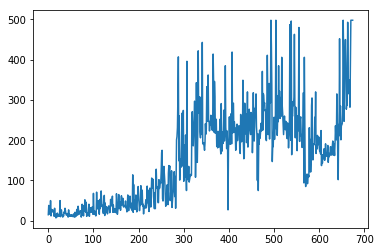

CPU times: user 3min 18s, sys: 1.69 s, total: 3min 19s
Wall time: 3min 14s


In [55]:
%%time
for e in range(1, EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1,state_size])
    for time in range(499):
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -1
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done or time == 498:
            print("episode: {}/{}, score: {}, e: {:.2}"
                  .format(e, EPISODES, time, agent.epsilon))
            break
    if time == 498:
        t+=1
    else:
        t=0
    results.append(time)
    if len(agent.memory) > batch_size and time !=498:
        agent.replay(batch_size, (state, action, reward, next_state, done))
    if t==5:
        break
plt.plot(results)
plt.show()